## Imports

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Preprocesing

In [23]:
csv_path = '../data/household_data_60min_singleindex.csv'

df = pd.read_csv(csv_path, parse_dates=["utc_timestamp", "cet_cest_timestamp"], index_col="utc_timestamp")

#residential apartment in urban area
columns_to_drop = [col for col in df.columns if not col.startswith('DE_KN_residential5')]

# Clear data
df = df.drop(columns= columns_to_drop)
df = df.dropna(how='all')

#Data shape and sample
print(f'Data shape: {df.shape}')
df.head()

Data shape: (30804, 4)


,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
utc_timestamp,,,,
2015-10-26 11:00:00+00:00,0.0,0.045,0.000,0.000
2015-10-26 12:00:00+00:00,0.0,0.395,0.071,0.148
2015-10-26 13:00:00+00:00,0.0,0.865,0.082,0.488
2015-10-26 14:00:00+00:00,0.0,1.085,0.126,0.575
2015-10-26 15:00:00+00:00,0.0,1.325,0.184,0.670


In [24]:
Correl = df.corr().sort_values('DE_KN_residential5_dishwasher')
Correl['DE_KN_residential5_dishwasher']

DE_KN_residential5_refrigerator       0.993991
DE_KN_residential5_washing_machine    0.998645
DE_KN_residential5_grid_import        0.999454
DE_KN_residential5_dishwasher         1.000000
Name: DE_KN_residential5_dishwasher, dtype: float64

## Processing data

In [25]:
df = df.diff().fillna(0)
#sum days 
#df.resample('D').sum()
df.head()

,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
utc_timestamp,,,,
2015-10-26 11:00:00+00:00,0.0,0.00,0.000,0.000
2015-10-26 12:00:00+00:00,0.0,0.35,0.071,0.148
2015-10-26 13:00:00+00:00,0.0,0.47,0.011,0.340
2015-10-26 14:00:00+00:00,0.0,0.22,0.044,0.087
2015-10-26 15:00:00+00:00,0.0,0.24,0.058,0.095


In [26]:
daily_usage_filtered = []
K = 10 #standard deviations

for column_name in df:
    mean = df[column_name].mean()
    std_dev = df[column_name].std()

    # Define a range for normal values (e.g., within 2 standard deviations)
    lower_bound = mean - K * std_dev
    upper_bound = mean + K * std_dev

    # Filter out values outside the normal range
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [27]:
df.head()

,DE_KN_residential5_dishwasher,DE_KN_residential5_grid_import,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
utc_timestamp,,,,
2015-10-26 11:00:00+00:00,0.0,0.00,0.000,0.000
2015-10-26 12:00:00+00:00,0.0,0.35,0.071,0.148
2015-10-26 13:00:00+00:00,0.0,0.47,0.011,0.340
2015-10-26 14:00:00+00:00,0.0,0.22,0.044,0.087
2015-10-26 15:00:00+00:00,0.0,0.24,0.058,0.095


In [28]:
grid_import = df['DE_KN_residential5_grid_import']

df = df.drop(columns= 'DE_KN_residential5_grid_import')

## Graphs

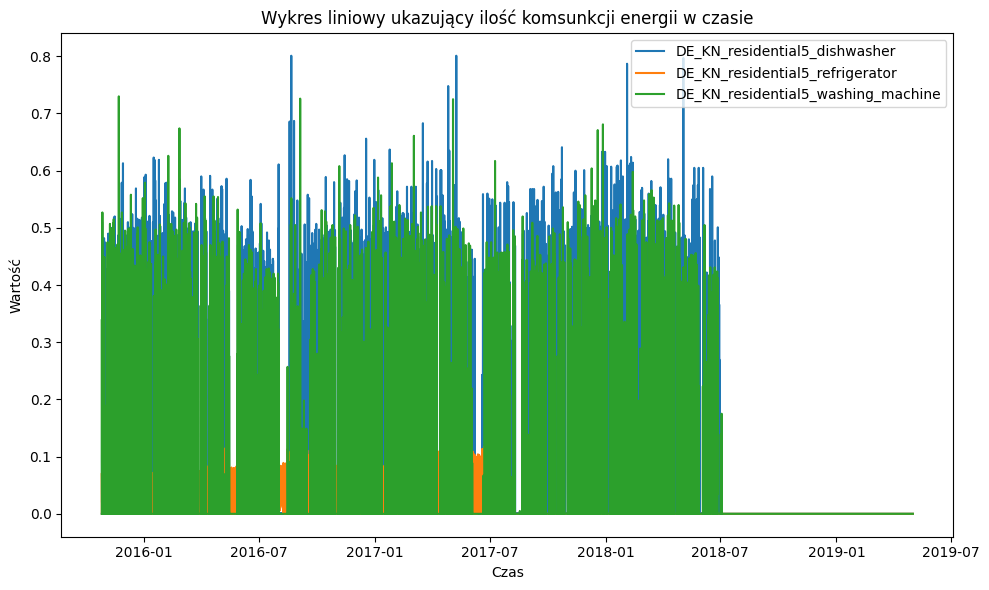

In [29]:
plt.figure(figsize=(10,6))

plt.plot(
    df.index, 
    df,
    )

plt.xlabel('Czas')
plt.ylabel('Wartość')
plt.title(f'Wykres liniowy ukazujący ilość komsunkcji energii w czasie')
plt.legend(df.columns)
plt.tight_layout()
plt.show()

In [30]:
df.head()

,DE_KN_residential5_dishwasher,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine
utc_timestamp,,,
2015-10-26 11:00:00+00:00,0.0,0.000,0.000
2015-10-26 12:00:00+00:00,0.0,0.071,0.148
2015-10-26 13:00:00+00:00,0.0,0.011,0.340
2015-10-26 14:00:00+00:00,0.0,0.044,0.087
2015-10-26 15:00:00+00:00,0.0,0.058,0.095


## Normality

In [31]:
from scipy.stats  import normaltest

statistic, p_value = normaltest(df)

print(f'Test statistic: {statistic}')
print(f'P-values, if lower than 0.05 then its normal distribution: {p_value}')

Test statistic: [28492.32925695  4786.62115106 32818.10897742]
P-values, if lower than 0.05 then its normal distribution: [0. 0. 0.]


## Split data 

In [32]:
# Prepare features and target
#features = (df.index.astype(np.int64) // 10**9).values.reshape(-1,1)
features = grid_import.values.reshape(-1,1)
target = df

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=22)


## LinearRegression model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create Linear Regression model
model_LR = LinearRegression()

# Train the model on the training data
model_LR.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_LR.predict(X_test)

# Evaluate model performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0035740763592292148


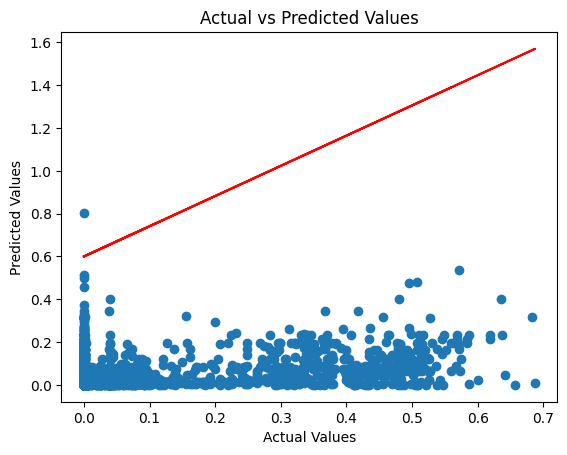

In [49]:
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

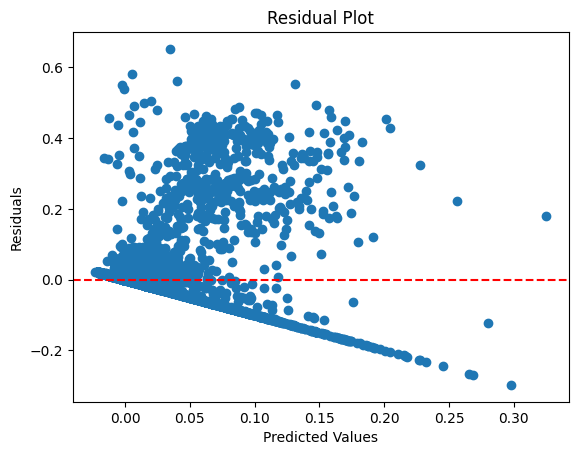

In [35]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

In [36]:
coefficients = model_LR.coef_
intercept = model_LR.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0.17172775]
 [0.01446388]
 [0.1065519 ]]
Intercept: [-0.02875379  0.01537445 -0.0153373 ]


## DecisionTreeRegressor Model

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
model_tree = DecisionTreeRegressor(max_depth=10)  # You can adjust hyperparameters like max_depth
model_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10)

In [39]:
y_pred = model_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0036372272440930004


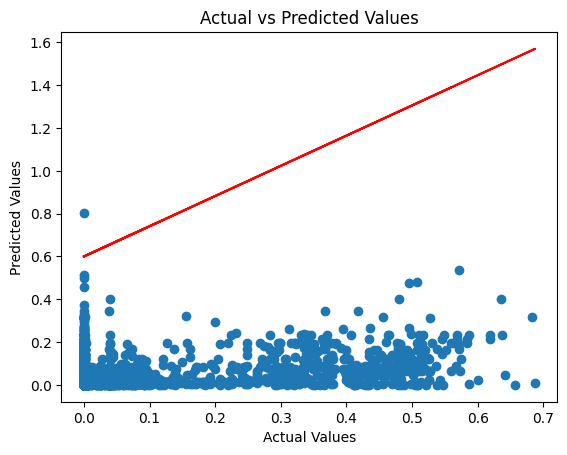

In [50]:
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

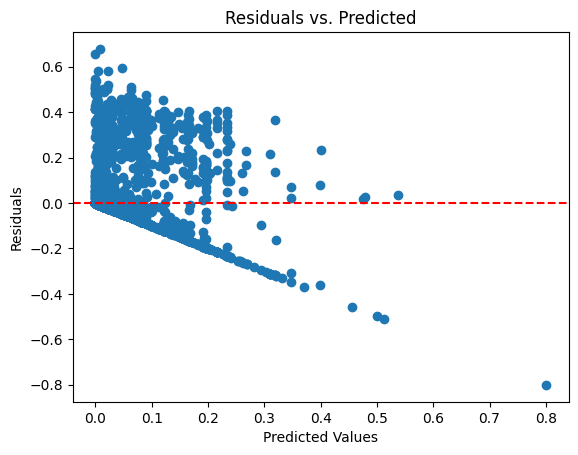

In [41]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

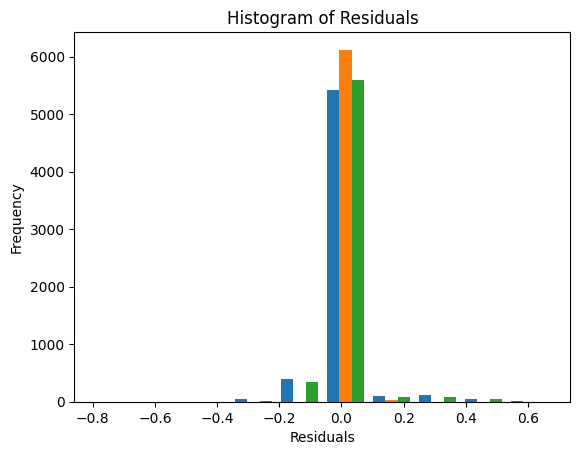

In [42]:
plt.hist(residuals, bins=10)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()